In [ ]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load and preprocess the MNIST dataset
# Load the dataset from Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshape the data to add a color channel dimension (since images are grayscale)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
# Normalize the pixel values to range from 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Step 3: Build the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Add a max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Add a second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Add a max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Add a third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Flatten the output for the dense layers
model.add(layers.Flatten())

In [ ]:
# Add a fully connected layer (Dense layer)
model.add(layers.Dense(64, activation='relu'))

In [ ]:
# Add the output layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.8586 - loss: 0.4571 - val_accuracy: 0.9863 - val_loss: 0.0509
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9826 - loss: 0.0569 - val_accuracy: 0.9863 - val_loss: 0.0453
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9897 - val_loss: 0.0399
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9893 - val_loss: 0.0364
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9917 - val_loss: 0.0328


In [ ]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0363
Test accuracy: 0.9904999732971191


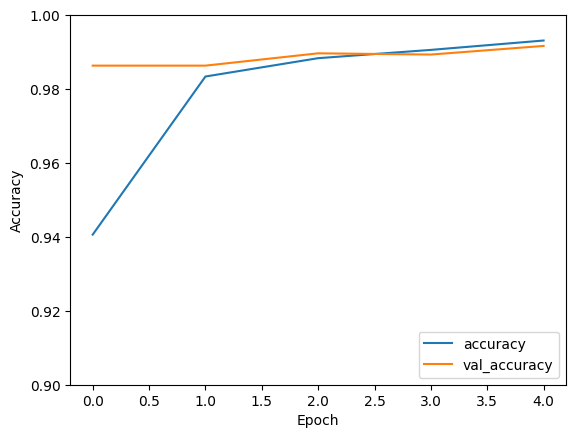

In [ ]:
# Step 7: Visualize the accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 8: Make predictions on test data
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


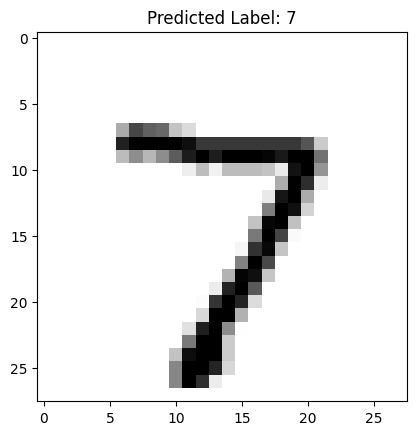

In [ ]:
# Visualize the first test image and its predicted label
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted Label: {predictions[0].argmax()}')
plt.show()